# Europe's Electric Vehicle Market: Development, Infrastructure, and Prospects for Strategic Policy

 Electric mobility is a revolution rather than a passing trend.    
 Through a variety of lenses, including fleet and registration statistics, infrastructure deployment, regulatory frameworks, and investment flows, this study examines the development of the EV ecosystem in Europe.

 Finding important **data-driven insights** and offering **strategic guidance** to stakeholders navigating the transition to sustainable transportation are what we want to accomplish.

In [18]:
import pandas as pd # Data manipulation
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Statistical data visualization
# Set visual style
sns.set_theme(style="whitegrid")


## EV Fleet Growth (M1 Vehicles)

In [19]:
# Load EV fleet dataset
df_fleet = pd.read_csv("AF Fleet (M1).csv")
df_fleet.columns = ['Year', 'BEV', 'PHEV', 'H2', 'LPG', 'CNG', 'LNG']

# Quick check
display(df_fleet.head())
print(df_fleet.info())
print(df_fleet.isna().sum())

,Year,BEV,PHEV,H2,LPG,CNG,LNG
0,2008,4156,NaN,NaN,5086774,585841,NaN
1,2009,4842,NaN,NaN,5556965,706864,NaN
2,2010,5761,NaN,1.0,6010762,768247,NaN
3,2011,13362,163.0,1.0,6333993,801533,NaN
4,2012,23648,3712.0,1.0,6619684,860290,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    18 non-null     int64  
 1   BEV     18 non-null     int64  
 2   PHEV    15 non-null     float64
 3   H2      16 non-null     float64
 4   LPG     18 non-null     int64  
 5   CNG     18 non-null     int64  
 6   LNG     7 non-null      float64
dtypes: float64(3), int64(4)
memory usage: 1.1 KB
None
Year     0
BEV      0
PHEV     3
H2       2
LPG      0
CNG      0
LNG     11
dtype: int64


## Overview of the Alternative Fuel Vehicle Registrations Dataset (2008–2025)

 The annual registration counts of alternative fuel-powered automobiles in Europe from 2008 to 2025 are included in this dataset.  Six fuel kinds are covered by the data:

 - **H₂**: Vehicles fueled by hydrogen; 
 - **LPG**: Liquefied Petroleum Gas; 
 - **CNG**: Compressed Natural Gas; 
 - **LNG**: Liquefied Natural Gas; 
 - **BEV**: Battery Electric Vehicles;
 - **PHEV**: Plug-in Hybrid Electric Vehicles;

 **Missing Values**: 
 - In the early years, some technologies (particularly PHEV, H₂, and LNG) were either nonexistent or unavailable.
 - The comparatively *late adoption of modern technology is reflected in the number of missing values.*

The dataset highlights the emergence of BEVs as the leading technology by enabling trend analysis of the EV and alternative fuel vehicle market across almost two decades.

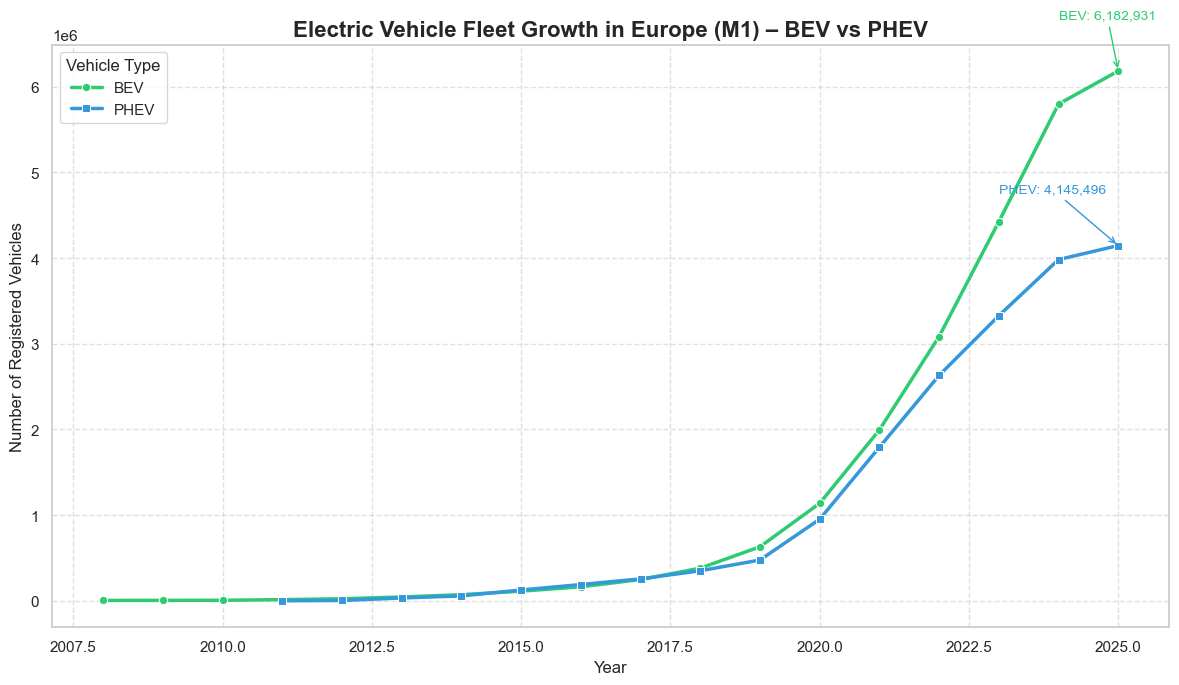

In [20]:
plt.figure(figsize=(12, 7))
palette = {"BEV": "#2ECC71", "PHEV": "#3498DB"}

# Lineplot with markers for BEV and PHEV
sns.lineplot(data=df_fleet, x='Year', y='BEV', label='BEV', marker='o', linewidth=2.5, color=palette['BEV'])
sns.lineplot(data=df_fleet, x='Year', y='PHEV', label='PHEV', marker='s', linewidth=2.5, color=palette['PHEV'])

# Annotations for the latest year
max_year = df_fleet['Year'].max()
max_bev = df_fleet.loc[df_fleet['Year'] == max_year, 'BEV'].values[0]
max_phev = df_fleet.loc[df_fleet['Year'] == max_year, 'PHEV'].values[0]

plt.annotate(f"BEV: {int(max_bev):,}", xy=(max_year, max_bev), xytext=(max_year-1, max_bev*1.1),
             arrowprops=dict(arrowstyle="->", color=palette['BEV']), fontsize=10, color=palette['BEV'])

plt.annotate(f"PHEV: {int(max_phev):,}", xy=(max_year, max_phev), xytext=(max_year-2, max_phev*1.15),
             arrowprops=dict(arrowstyle="->", color=palette['PHEV']), fontsize=10, color=palette['PHEV'])

# Title and labels
plt.title('Electric Vehicle Fleet Growth in Europe (M1) – BEV vs PHEV', fontsize=16, weight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Registered Vehicles')
plt.grid(True, which='major', linestyle='--', alpha=0.6)
plt.legend(title="Vehicle Type")
plt.tight_layout()
plt.show()

### Perspective: The Silent Revolution Has Started

 A significant change in consumer behavior and corporate strategy is indicated by the dramatic rise in BEV and PHEV fleets starting in 2018.  
 The fact that **BEVs surpass PHEVs after 2020** is noteworthy since it reflects both customer preference and a more robust legislative drive for complete electrification.

  This provides the groundwork for exponential growth and highlights how crucial policy and infrastructural congruence is.

## Integrated EV Market Trends in Europe (2008–2023)

In [21]:

# Data loading and preparation
df_fleet = pd.read_csv("AF Fleet (M1).csv")
df_registrations = pd.read_csv("AF New registrations (M1).csv")
df_market_share = pd.read_csv("AF Market share of total registrations (M1).csv")

# Rename columns for clarity
df_fleet.columns = ['Year', 'BEV_Fleet', 'PHEV_Fleet', 'H2_Fleet', 'LPG_Fleet', 'CNG_Fleet', 'LNG_Fleet']
df_registrations.columns = ['Year', 'BEV_Reg', 'PHEV_Reg', 'H2_Reg', 'LPG_Reg', 'CNG_Reg', 'LNG_Reg']
df_market_share.columns = ['Year', 'BEV_Share', 'PHEV_Share', 'H2_Share', 'LPG_Share', 'CNG_Share', 'LNG_Share']

# Merge
df_merged = df_fleet.merge(df_registrations, on='Year').merge(df_market_share, on='Year')

# Check merged data
print(df_merged.info())
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        18 non-null     int64  
 1   BEV_Fleet   18 non-null     int64  
 2   PHEV_Fleet  15 non-null     float64
 3   H2_Fleet    16 non-null     float64
 4   LPG_Fleet   18 non-null     int64  
 5   CNG_Fleet   18 non-null     int64  
 6   LNG_Fleet   7 non-null      float64
 7   BEV_Reg     18 non-null     int64  
 8   PHEV_Reg    18 non-null     int64  
 9   H2_Reg      18 non-null     int64  
 10  LPG_Reg     18 non-null     int64  
 11  CNG_Reg     18 non-null     int64  
 12  LNG_Reg     0 non-null      float64
 13  BEV_Share   17 non-null     float64
 14  PHEV_Share  17 non-null     float64
 15  H2_Share    17 non-null     float64
 16  LPG_Share   17 non-null     float64
 17  CNG_Share   17 non-null     float64
 18  LNG_Share   0 non-null      float64
dtypes: float64(10), int64(9)
memory

,Year,BEV_Fleet,PHEV_Fleet,H2_Fleet,LPG_Fleet,CNG_Fleet,LNG_Fleet,BEV_Reg,PHEV_Reg,H2_Reg,LPG_Reg,CNG_Reg,LNG_Reg,BEV_Share,PHEV_Share,H2_Share,LPG_Share,CNG_Share,LNG_Share
0,2008,4156,NaN,NaN,5086774,585841,NaN,0,0,0,129906,115338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,4842,NaN,NaN,5556965,706864,NaN,130,2,0,443640,145990,NaN,0.00,0.00,0.0,3.27,1.08,NaN
2,2010,5761,NaN,1.0,6010762,768247,NaN,752,2,0,440622,78846,NaN,0.01,0.00,0.0,3.87,0.69,NaN
3,2011,13362,163.0,1.0,6333993,801533,NaN,8014,329,0,225669,52942,NaN,0.07,0.00,0.0,2.00,0.47,NaN
4,2012,23648,3712.0,1.0,6619684,860290,NaN,12716,8025,0,297935,66930,NaN,0.13,0.08,0.0,2.97,0.67,NaN


### Overview of the Dataset: Fleet, Registrations, and Market Share of Alternative Fuel Vehicles (2008–2025)

 From 2008 to 2025, this dataset offers a thorough yearly summary of alternative fuel vehicles (AFVs) in Europe along three important dimensions:

1. The total number of vehicles in circulation for each fuel type is the **fleet size** (*_Fleet`).
2. **New Registrations**: Every year, vehicles are registered for the *first time* (*_Reg).
3. **Market Share**: The proportion of each fuel type in all newly registered vehicles (*_Share)

 The fuel types that are being tracked are as follows: 
 - **BEV**, or battery electric vehicles; 
 - **PHEV**  Electric vehicles that are plug-in hybrids 
 - **H₂**  * LPG** - Hydrogen  Compressed Natural Gas 
 - **LNG** - Liquefied Petroleum Gas 
 - **CNG**  Evaporated Natural Gas

**Notable Features**: 
- The fleet and registrations of BEVs and PHEVs are growing **exponentially**.
- A number of figures are absent for new fuels (such as LNG and hydrogen), indicating their still-limited uptake.
- Due to its limited use in passenger cars, LNG data is mainly unavailable.

The following longitudinal analyses are made possible by this dataset: 
- Technology adoption curves 
- Policy influence over time 
- Comparative growth across fuel types 
- Correlation between fleet expansion and registrations

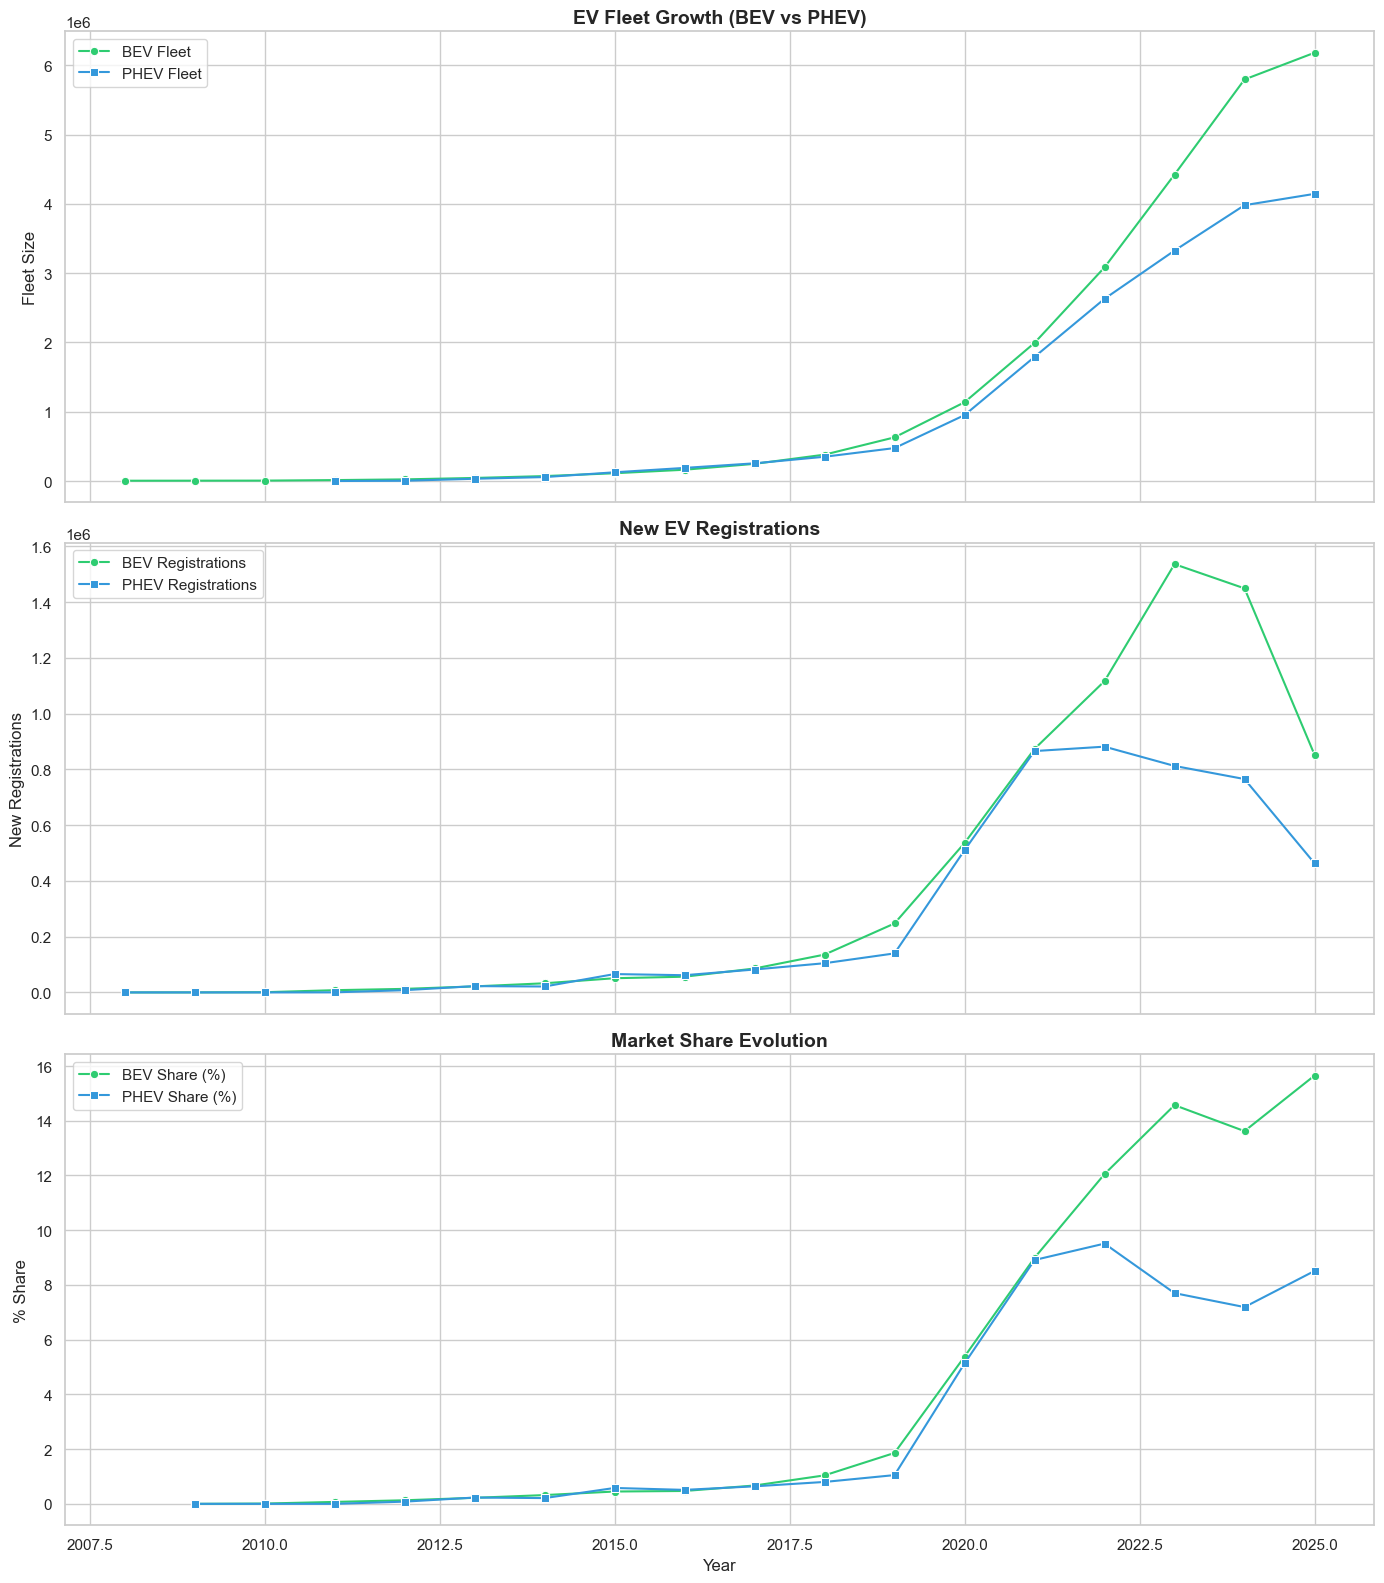

In [22]:
palette = {"BEV": "#2ECC71", "PHEV": "#3498DB"}

fig, axs = plt.subplots(3, 1, figsize=(14, 16), sharex=True)

# FLEET 
sns.lineplot(data=df_merged, x='Year', y='BEV_Fleet', ax=axs[0], label="BEV Fleet", marker='o', color=palette['BEV'])
sns.lineplot(data=df_merged, x='Year', y='PHEV_Fleet', ax=axs[0], label="PHEV Fleet", marker='s', color=palette['PHEV'])
axs[0].set_title("EV Fleet Growth (BEV vs PHEV)", fontsize=14, weight='bold')
axs[0].set_ylabel("Fleet Size")
axs[0].legend()

# REGISTRATIONS
sns.lineplot(data=df_merged, x='Year', y='BEV_Reg', ax=axs[1], label="BEV Registrations", marker='o', color=palette['BEV'])
sns.lineplot(data=df_merged, x='Year', y='PHEV_Reg', ax=axs[1], label="PHEV Registrations", marker='s', color=palette['PHEV'])
axs[1].set_title("New EV Registrations", fontsize=14, weight='bold')
axs[1].set_ylabel("New Registrations")
axs[1].legend()

# MARKET SHARE
sns.lineplot(data=df_merged, x='Year', y='BEV_Share', ax=axs[2], label="BEV Share (%)", marker='o', color=palette['BEV'])
sns.lineplot(data=df_merged, x='Year', y='PHEV_Share', ax=axs[2], label="PHEV Share (%)", marker='s', color=palette['PHEV'])
axs[2].set_title("Market Share Evolution", fontsize=14, weight='bold')
axs[2].set_ylabel("% Share")
axs[2].legend()

plt.xlabel("Year", fontsize=12)
plt.tight_layout()
plt.show()

### European EV Adoption Trends (2008–2025)

 Battery electric vehicles (BEV) and plug-in hybrid electric vehicles (PHEV) are compared in this section based on three important factors: market share, fleet size, and new registrations.

 ---

 #### 1. Growth of the EV Fleet (BEV versus PHEV)

 The expansion of Europe's circulating EV fleet is depicted in this figure.

- Up until 2018, the fleets of BEVs and PHEVs expanded gradually and similarly.
- There is a notable acceleration starting in 2020, particularly for BEVs, which overtake PHEVs starting in 2021.
- Increased model availability, longer battery life, and government incentives are all factors contributing to the expansion.

  **Insight**: With increasing momentum over time, BEVs have emerged as the leading EV technology in Europe.

 ---
### 2. New EV Registrations (PHEV vs. BEV) 

 The annual number of newly registered cars is shown in this chart.

 The use of EVs increased dramatically starting in 2020 and peaked in 2022.
 -  Compared to BEVs, PHEV registrations fell more precipitously after the peak.
 -  This implies that regulatory support is moving toward fully electric vehicles and that PHEVs are increasingly seen as a transitional technology.

  **Insight**: BEVs are becoming more and more popular than PHEVs.

 ---

### 3. Evolution of Market Share (%)
The percentage of BEVs and PHEVs in all new car registrations is shown in this chart.

Prior to 2015, both technologies had small market shares (less than 1%).

- While PHEVs steadied at 8–9%, BEVs have significantly increased their market share after 2020, reaching about 16% in 2025.
- A fundamental shift toward complete electrification is confirmed by the data.

 **Note on data source and calculation:**
- The percentages shown are **not calculated manually** from raw registration numbers.
- Instead, they are **directly sourced from the dataset**:

- `AF Market share of total registrations (M1).csv`  
- This file provides annual market shares (%) for each fuel type, including **BEV, PHEV, Petrol, Diesel**, and others.

The values represent the proportion of each fuel type over the **total new M1 category vehicle registrations** in Europe.

 **Insight**: BEVs are gaining market share in addition to increasing in absolute numbers.

 ---

 ### Key Takeaway

 When taken as a whole, these three figures show a distinct shift: **BEVs are no longer a niche, they are becoming the mainstream.** Consumer preferences, policy frameworks, and technology advancements are coming together to make fully electric vehicles the way of the future for mobility in Europe.

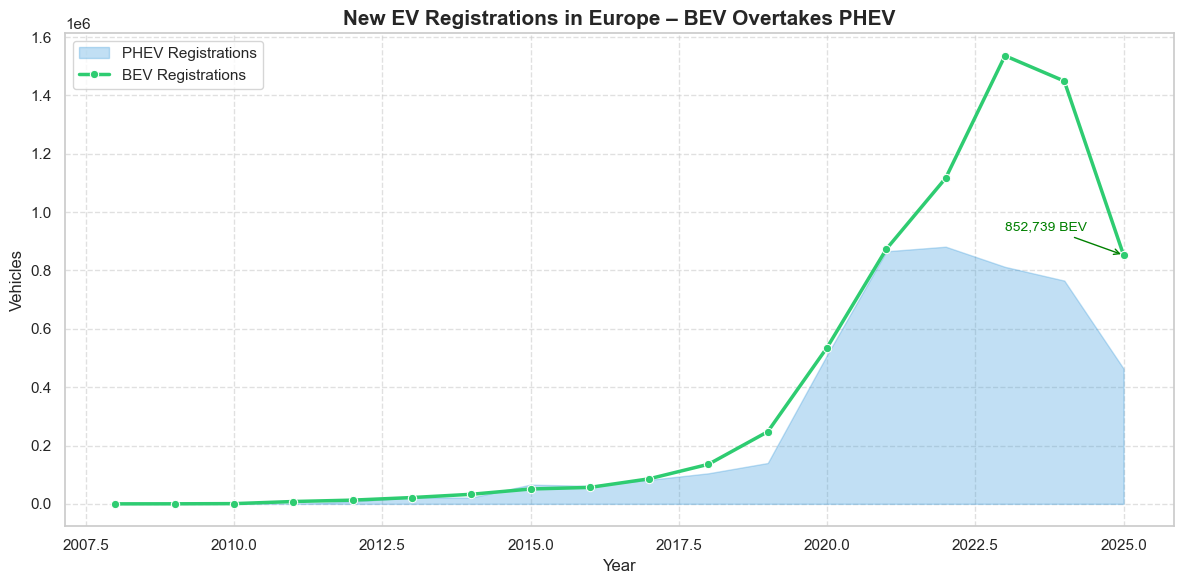

In [23]:
plt.figure(figsize=(12, 6))

# Area plot for PHEV registrations
plt.fill_between(df_merged['Year'], df_merged['PHEV_Reg'], color="#3498DB", alpha=0.3, label='PHEV Registrations')

# Lineplot for BEV registrations
sns.lineplot(data=df_merged, x='Year', y='BEV_Reg', label='BEV Registrations', color="#2ECC71", marker='o', linewidth=2.5)

# Annotazion for peak BEV registrations
peak_year = df_merged['Year'].max()
peak_bev = df_merged.loc[df_merged['Year'] == peak_year, 'BEV_Reg'].values[0]
plt.annotate(f'{int(peak_bev):,} BEV', xy=(peak_year, peak_bev), xytext=(peak_year - 2, peak_bev * 1.1),
             arrowprops=dict(arrowstyle='->', color='green'), fontsize=10, color='green')

# Title
plt.title("New EV Registrations in Europe – BEV Overtakes PHEV", fontsize=15, weight='bold')
plt.xlabel("Year")
plt.ylabel("Vehicles")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### Focus Chart: New Registrations for BEVs vs. PHEVs (2008–2025)

 This updated graph provides a targeted comparison of the yearly new registrations of Plug-in Hybrid Electric Vehicles (PHEV) and Battery Electric Vehicles (BEV) in Europe.

 #### What's Behind This Image?

The goal is to **visually depict the tipping point**, a pivotal moment in the transition to electric transportation, at when BEVs overtake PHEVs.

- The historical growth and subsequent reduction of PHEV registrations are contextualized by the **area plot**.
- It is simple to identify the inflection point and growth acceleration using the **line plot with markers** for BEV registrations.
- A **custom annotation** on the 2025 number highlights how BEVs are still in the lead, despite a minor drop.

#### Strategic Perspective

The message conveyed by this image is rather clear: **BEVs have not only overtaken PHEVs, but they are now the main driver of new EV registrations in Europe.**

The trend shift is easy to see even at a glance thanks to the usage of contrasting styles (area vs. line), which makes it perfect for policy briefings or corporate stakeholders.

## EU Regulations: The Force Behind the Electric Vehicle Revolution

An increasingly stringent regulatory environment is strategically driving Europe's transition to electric mobility.  Important policy turning points include:

### European-Level Initiatives
- **Fit for 55 Package**: Target to reduce greenhouse gas emissions by 55% by 2030 (vs. 1990 levels).
- **ICE Ban by 2035**: The European Parliament approved the phase-out of new internal combustion engine (ICE) vehicles by 2035.
- **AFIR Regulation (2023)**: Establishes minimum requirements for charging infrastructure across the EU.
- **Euro 7 Standard**: Sets stricter emissions limits (especially NOx and particulates) for all vehicles starting in 2025.

### National Recovery & Resilience Plans (NRRPs)
Many Member States allocated Recovery Fund resources to sustainable mobility, including:
- Purchase subsidies for EVs
- Tax incentives and VAT exemptions
- Investment in charging stations

These policies have created a fertile ground for EV adoption, as seen in rising fleet and registration numbers.

>  *Strategic Insight:*  
> EU regulation is not reactive, it is **anticipatory**.  
> By combining incentives, restrictions, and infrastructure mandates, the European model creates a *predictable and investible* EV ecosystem.

In [24]:
# Incentives and Regulatory Framework (Updated with Italy)
df_incentivs = pd.DataFrame({
    "Country": ["Spain", "Netherlands", "France", "Germany", "Italy"],
    "Purchase Subsidy (max €)": [
        "7,000 (with scrappage)",
        "2,950 new / 2,000 used",
        "various up to ~7,000",
        "up to ~6,000 + innovation bonus",
        "5,000 (BEV) / 2,000 (PHEV)"
    ],
    "Tax Benefits": [
        "Registration tax exempt; up to 75% reduction on local road tax",
        "Exemptions on registration & road tax until 2024",
        "Administration tax halved; CO₂‑based incentives",
        "Exemption on circulation tax (5‑10 yrs); innovation bonus extended",
        "5 yrs exemption + 75% discount afterwards"
    ],
    "Charging Infra Notes": [
        "National support via MOVES",
        "Municipal-led; top charger density in EU",
        "Top charger country; investment schemes",
        "Strong infrastructure plan; BEV penetration focus",
        "80% subsidy for private wallboxes (max €1,500)"
    ],
    "Source": [
        "https://alternative-fuels-observatory.ec.europa.eu/transport-mode/road/spain/incentives-legislations",
        "https://alternative-fuels-observatory.ec.europa.eu/transport-mode/road/netherlands/incentives-legislations",
        "https://alternative-fuels-observatory.ec.europa.eu/system/files/documents/2024-07/FR%20Report%20-EC%20LAYOUT-FINAL.pdf",
        "https://en.wikipedia.org/wiki/Electric_car_use_by_country",
        "https://alternative-fuels-observatory.ec.europa.eu/transport-mode/road/italy/incentives-legislations"
    ]
})

# visualize the incentives DataFrame
df_incentivs

,Country,Purchase Subsidy (max €),Tax Benefits,Charging Infra Notes,Source
0,Spain,"7,000 (with scrappage)",Registration tax exempt; up to 75% reduction o...,National support via MOVES,https://alternative-fuels-observatory.ec.europ...
1,Netherlands,"2,950 new / 2,000 used",Exemptions on registration & road tax until 2024,Municipal-led; top charger density in EU,https://alternative-fuels-observatory.ec.europ...
2,France,"various up to ~7,000",Administration tax halved; CO₂‑based incentives,Top charger country; investment schemes,https://alternative-fuels-observatory.ec.europ...
3,Germany,"up to ~6,000 + innovation bonus",Exemption on circulation tax (5‑10 yrs); innov...,Strong infrastructure plan; BEV penetration focus,https://en.wikipedia.org/wiki/Electric_car_use...
4,Italy,"5,000 (BEV) / 2,000 (PHEV)",5 yrs exemption + 75% discount afterwards,"80% subsidy for private wallboxes (max €1,500)",https://alternative-fuels-observatory.ec.europ...


Data summarised from EAFO sources and national reports, updated to 2024

**Sources:**
1. [Spain – EAFO Country Report](https://alternative-fuels-observatory.ec.europa.eu/transport-mode/road/spain/incentives-legislations)
2. [Netherlands – EAFO Report 2023](https://alternative-fuels-observatory.ec.europa.eu/transport-mode/road/netherlands/incentives-legislations)
3. [France – EAFO Country Summary](https://alternative-fuels-observatory.ec.europa.eu/system/files/documents/2024-07/FR%20Report%20-EC%20LAYOUT-FINAL.pdf)
4. [Germany – Wikipedia (EVs by country)](https://en.wikipedia.org/wiki/Electric_car_use_by_country)
5. [Italy – EAFO Country Report](https://alternative-fuels-observatory.ec.europa.eu/transport-mode/road/italy/incentives-legislations)

##  Charging Infrastructure in the EU (2020–2025)

Infrastructure for charging must be invested in concurrently for the shift to electric mobility to be successful. 
 Using data from 2020 to 2025, this section examines the quarterly increase of AC (standard) and DC (fast/ultrafast) charging stations in the EU27.

In [25]:

df_recharge_total = pd.read_csv("EAFO_RechargingPoints_Total_EU27_2020Q1_2025Q2.csv")
df_recharge_growth = pd.read_csv("EAFO_RechargingPoints_Growth_EU27_2020Q1_2025Q2.csv")


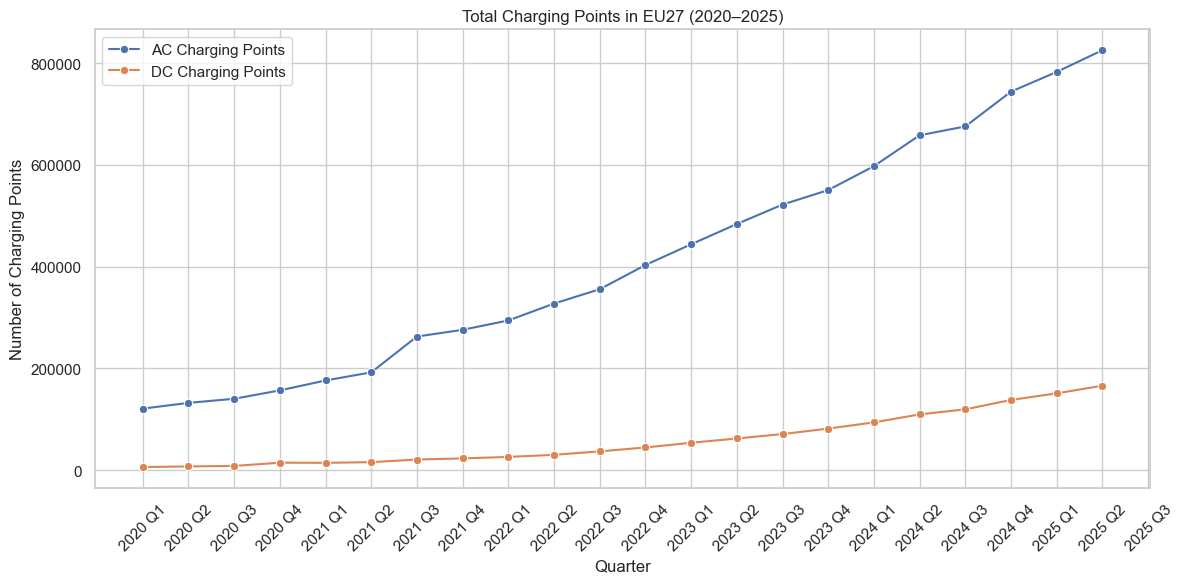

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_recharge_total, x="Category", y="AC", label="AC Charging Points", marker="o")
sns.lineplot(data=df_recharge_total, x="Category", y="DC", label="DC Charging Points", marker="o")
plt.title("Total Charging Points in EU27 (2020–2025)")
plt.ylabel("Number of Charging Points")
plt.xlabel("Quarter")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### EU27 Growth in EV Charging Infrastructure (2020–2025)

 This graph illustrates how public charging infrastructure has changed throughout the EU27, segmented by:

- **AC Charging Points**: standard-speed chargers, usually used for overnight charging at home or in public  
- For long-distance travel and quick top-ups, **DC Charging Points** are fast and ultra-fast chargers.

 ---

 #### Observations
- There has been a steady increase in the overall number of charging stations between Q1 2020 and Q2 2025.
- By mid-2025, the number of AC chargers will have surpassed 800,000.
- Despite being fewer, **DC chargers** exhibit **faster relative growth**, surpassing 160,000 throughout the same time frame.
-  Around **Q3 2021**, there is a significant turning point when AC installation picks up speed, either due to national investment initiatives or EU recovery funding.

 ---

#### Strategic Understanding
 The expansion of charging infrastructure, particularly fast DC chargers, is **essential for long-distance EV usability** and consumer confidence.  
 The acceleration of DC implementation indicates **a move toward faster, more flexible e-mobility** throughout Europe, notwithstanding the dominance of AC points.

 The EU's **AFIR regulation** and the impending 2035 ICE phase-out targets are in line with this infrastructure expansion.

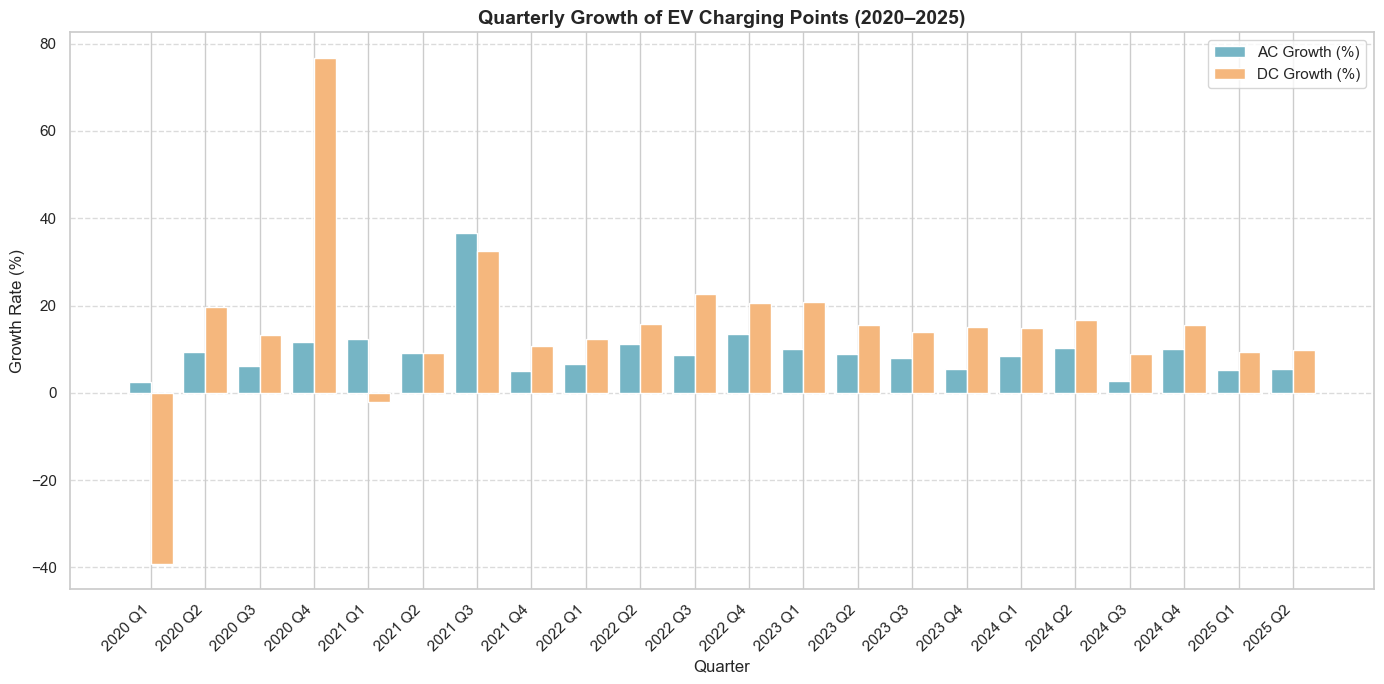

In [27]:
# Stile of presentation
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
bar_width = 0.4
x = range(len(df_recharge_growth))

plt.bar(x, df_recharge_growth["AC"], width=bar_width, label="AC Growth (%)", color="#76b5c5")
plt.bar([i + bar_width for i in x], df_recharge_growth["DC"], width=bar_width, label="DC Growth (%)", color="#f5b77d")

# X-axis
plt.xticks([i + bar_width / 2 for i in x], df_recharge_growth["Category"], rotation=45, ha="right")

# title and labels
plt.title("Quarterly Growth of EV Charging Points (2020–2025)", fontsize=14, weight='bold')
plt.xlabel("Quarter")
plt.ylabel("Growth Rate (%)")

# Legenda
plt.legend(loc="upper right", frameon=True)


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### EV Charging Point Growth Rate by Quarter (AC versus DC)

 The **quarter-over-quarter increase rate (%)** of public charging stations in the EU27 is shown in this figure, broken down by:
- **DC chargers** (rapid charging capability), the orange one 
- **AC chargers** (normal charging speed), the skyblue one

 ---

 #### Important Findings

- The **volatility in early quarters (2020–2021)** points to uneven rollout attempts, which may be the result of disjointed national strategies and COVID-19 disruptions.
- Growth stabilizes starting in **Q3 2021**, particularly for DC chargers, which continue to expand by double digits.
- In 2020–2021, DC may see a few **negative growth quarters** due to decommissioning or reporting delays.
- The concentrated policy-driven installations are probably the cause of the **2020 Q4 spike** in DC growth (~78%).

 ---

#### Interpretation of Strategy

 > **The speed of deployment has slowed slightly** since 2023, which could be a roadblock for EV adoption, even though the number of charging stations is increasing. Growth momentum is just as important as the overall infrastructure.

 According to the EU Green Deal and AFIR law, maintaining consistent growth is crucial to meeting 2030 climate and mobility commitments, particularly in **fast-charging infrastructure**.

In [28]:
df_emissions = pd.DataFrame({
    "Vehicle Type": [
        "Petrol Car (ICE) – EU Average (2023)",
        "BEV – EU Electricity Mix",
        "BEV – 100% Renewable Grid"
    ],
    "Avg Emissions (gCO2/km)": [106.4, 70, 5],
    "Source": [
        "https://www.eea.europa.eu/en/analysis/indicators/co2-performance-of-new-passenger", 
        "https://www.iea.org/reports/global-ev-outlook-2024",
        "https://www.iea.org/reports/global-ev-outlook-2024"
    ]
})

df_emissions

,Vehicle Type,Avg Emissions (gCO2/km),Source
0,Petrol Car (ICE) – EU Average (2023),106.4,https://www.eea.europa.eu/en/analysis/indicato...
1,BEV – EU Electricity Mix,70.0,https://www.iea.org/reports/global-ev-outlook-...
2,BEV – 100% Renewable Grid,5.0,https://www.iea.org/reports/global-ev-outlook-...


### Average CO₂ Emissions per km – ICE vs BEV (Europe)

| Vehicle Type              | Avg Emissions (gCO₂/km) | Source                                                                 |
|---------------------------|--------------------------|------------------------------------------------------------------------|
| Petrol Car (ICE)          | ~115                     | [EEA Data 2023](https://www.eea.europa.eu/en/analysis/indicators/co2-performance-of-new-passenger)  [oai_citation:0‡European Environment Agency](https://www.eea.europa.eu/en/analysis/indicators/co2-performance-of-new-passenger?utm_source=chatgpt.com) [oai_citation:1‡virta.global](https://www.virta.global/blog/the-future-of-electromobility-ieas-global-ev-outlook?utm_source=chatgpt.com) |
| Diesel Car (ICE)          | (not specified)          | —                                                                     |
| BEV – EU Electricity Mix  | ~60–80                   | [IEA Global EV Outlook 2024](https://www.iea.org/reports/global-ev-outlook-2024) |
| BEV – 100% Renewable Grid | ~5                       | [IEA LCA data](https://www.iea.org/reports/global-ev-outlook-2024)    |

>  *Note*: The value “Petrol Car (~115 g/km)” reflects the EU’s real-world 2023 average for all newly registered cars (including EVs), according to EEA data. It is used here as a proxy when ICE-specific values are not separately available.

/var/folders/wq/gchx2vvx1gz9nmv_khkx73_00000gn/T/ipykernel_57724/991071324.py:24: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


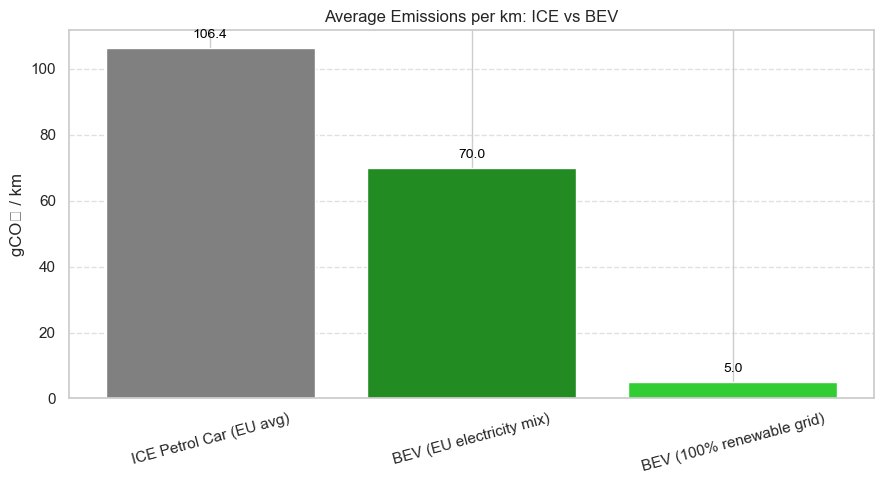

In [29]:
# Data about average emissions of CO₂ (g/km)
labels = [
    "ICE Petrol Car (EU avg)",
    "BEV (EU electricity mix)",
    "BEV (100% renewable grid)"
]
values = [106.4, 70, 5]

# graphical representation
plt.figure(figsize=(9, 5))
bars = plt.bar(labels, values, color=['grey', 'forestgreen', 'limegreen'])

# Labels and title
plt.ylabel("gCO₂ / km")
plt.title("Average Emissions per km: ICE vs BEV")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 2, f'{yval:.1f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Key Takeaways on Environmental Impact

- Even when driven by the existing EU electricity mix, EVs dramatically cut CO₂ emissions (~70 g/km vs. 106.4 g/km for gasoline).
- When using **100% renewable energy** under ideal circumstances, BEVs can cut emissions by more than **95%**.
- These projections fall **far short of the EU fleet targets** for 2025 and 2030.
- But entire lifecycle sustainability also needs to take into consideration:
    - The energy required to produce batteries is initially high but eventually depreciated.
    - Environmental and ethical considerations while sourcing nickel, cobalt, and lithium
    - The new EU Battery Regulation 2023 addresses battery recycling.

> EVs aren't flawless, but when combined with sustainable electricity and ethical sourcing, they're a huge improvement.

## European EV Ecosystem Investments

 The spread of EVs in Europe is supported by both public and private investments.

### Public Investment – EU & National Level
- **EU Recovery & Resilience Facility (RRF)**: €723B fund launched after COVID-19. Over **40% is allocated to climate-related goals**, including clean transport.
- **AFIR Regulation (2023)**: mandates minimum charging infrastructure per km and per vehicle.
- **Innovation Fund**: €40B to support clean tech (batteries, hydrogen, charging networks).

### National Programs
- **Italy (PNRR)**: €19B for sustainable mobility; incentives for BEVs and wallbox subsidies.
- **Spain (MOVES III)**: €1.2B for EV purchase and charging stations, active until 2025.
- **France**: support to Gigafactory projects (ACC) and battery R&D hubs.

### Private Investments
- **Gigafactories**: major players include:
  - *ACC (France-Germany-Italy)* → Stellantis, TotalEnergies
  - *Northvolt (Sweden)* → supported by VW and EIB
  - *Volkswagen PowerCo* → targets 240 GWh/year capacity
- **Startups to watch**:
  - *Rimac Automobili (Croatia)* – hypercar EV technology
  - *Sono Motors (Germany)* – solar-powered EV (in trouble, but innovative)
  - *Lightyear (Netherlands)* – solar panels integrated into body

> The convergence of public and private funding is shaping Europe’s EV future – but regional disparities persist.

### Sources
- European Commission (2023). [Recovery and Resilience Facility](https://ec.europa.eu/info/business-economy-euro/recovery-coronavirus/recovery-and-resilience-facility_en)
- European Parliament (2023). [Alternative Fuels Infrastructure Regulation](https://www.europarl.europa.eu/news/en/press-room/20230706IPR97438)
- EU Innovation Fund. [climate.ec.europa.eu](https://climate.ec.europa.eu/eu-action/funding-climate-action/innovation-fund_en)
- PNRR Italia. [italiadomani.gov.it](https://italiadomani.gov.it)
- MOVES III – Spain. [IDAE](https://www.idae.es/index.php/ayudas-y-financiacion/para-movilidad/programa-moves-iii)
- Northvolt. [northvolt.com](https://northvolt.com)
- Volkswagen PowerCo. [Volkswagen Group](https://www.volkswagen-newsroom.com/en/press-releases/volkswagen-groups-new-battery-company-powerco-launched-14121)
- Startups: Rimac, Sono Motors, Lightyear (official websites)

In [30]:
# Verified and synthetic dataset: public vs private funds for EV in Europe
df_ev_funding = pd.DataFrame({
    "Type of Funding": ["Public (EU, EIB, Innovation Fund)", "Private (PE, Venture, FDI)"],
    "Estimated Capital (€ bn)": [70, 3.2],
    "Estimated Period": ["2025–2027", "2022 (S&P Global data)"],
    "Source": [
        "EIB, Innovation Fund, Reuters",
        "S&P Global, Bruegel"
    ],
    "Source Link": [
        "https://www.reuters.com/technology/eib-allot-70-bln-euros-tech-sector-2025-2027-officials-2025-06-20/",
        "https://www.spglobal.com/market-intelligence/en/news-insights/articles/2023/5/private-equity-investment-in-european-ev-industry-up-in-q1-75925619/"
    ]
})

df_ev_funding

,Type of Funding,Estimated Capital (€ bn),Estimated Period,Source,Source Link
0,"Public (EU, EIB, Innovation Fund)",70.0,2025–2027,"EIB, Innovation Fund, Reuters",https://www.reuters.com/technology/eib-allot-7...
1,"Private (PE, Venture, FDI)",3.2,2022 (S&P Global data),"S&P Global, Bruegel",https://www.spglobal.com/market-intelligence/e...


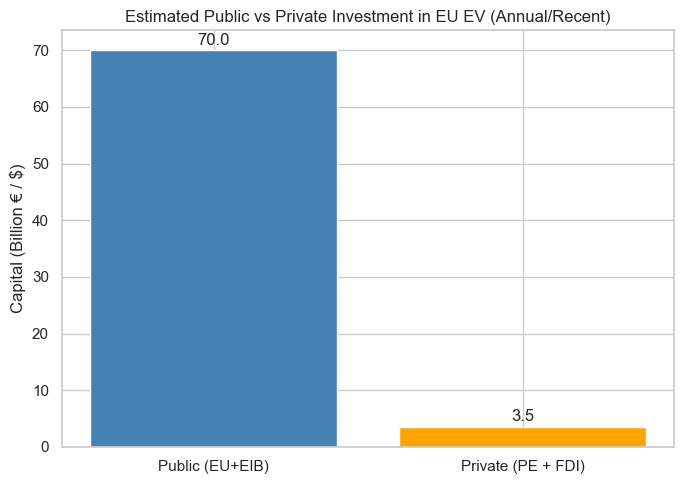

In [31]:
categories = ["Public (EU+EIB)", "Private (PE + FDI)"]
values = [70, 3.5] # In billion euros / billion dollars

plt.figure(figsize=(7, 5))
bars = plt.bar(categories, values, color=['steelblue', 'orange'])
plt.title("Estimated Public vs Private Investment in EU EV (Annual/Recent)")
plt.ylabel("Capital (Billion € / $)")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.1f}", ha='center')
plt.tight_layout()
plt.show()

**Funding Sources Summary:**

- **Public capital**: EU funds and related institutions such as the EIB demonstrate a massive commitment (~€70 bn for 2025–27 alone), focusing on clean technologies and decarbonization.
- **Private capital**: the European EV sector attracted over **$3.5 bn in private equity** in 2022 alone, with **Chinese FDI** showing steady growth.
- → **Public funding acts as a catalyst for private capital**, de-risking investment and aligning stakeholders with EU industrial strategies.

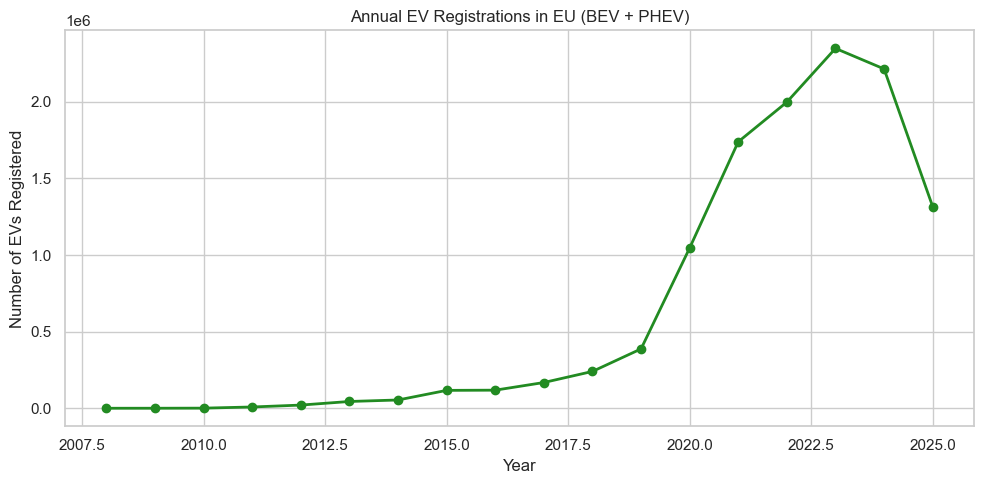

In [32]:
df_ev_trend = pd.DataFrame()
df_ev_trend["Year"] = df_registrations["Year"].astype(int)
df_ev_trend["EV Registrations"] = df_registrations["BEV_Reg"] + df_registrations["PHEV_Reg"]

plt.figure(figsize=(10, 5))
plt.plot(df_ev_trend["Year"], df_ev_trend["EV Registrations"], marker='o', linewidth=2, color='forestgreen')
plt.title("Annual EV Registrations in EU (BEV + PHEV)")
plt.xlabel("Year")
plt.ylabel("Number of EVs Registered")
plt.grid(True)
plt.tight_layout()
plt.show()

### EU Annual BEV + PHEV EV Registrations

 The total number of Plug-in Hybrid Electric Vehicles (PHEVs) and Battery Electric Vehicles (BEVs) registered in the EU each year between 2008 and 2025 is displayed in this chart.

 #### Important Findings:

 The impact of national incentives, rising consumer demand, and EU-level climate legislation is reflected in the **exponential growth from 2019 to 2023**.
 -  The COVID recovery stimulus and green mobility goals outlined in national recovery plans are in line with the **sharp rise in 2020–2021**.
 - **Registrations peak** in 2023 (~2.3 million units), and then there is a discernible **decrease in 2024–2025**.
   -  This could be a result of price sensitivity among consumers, supply chain interruptions, or the phase-out of subsidies.

### Strategic Consequences:

 > The post-peak fall indicates that **policy support and charging infrastructure** need to change to maintain momentum, even though the EV market has developed considerably.

 To assess if Europe is still on pace to reach its **2030 zero-emission mobility goals**, it is imperative to keep an eye on **registration trends**.

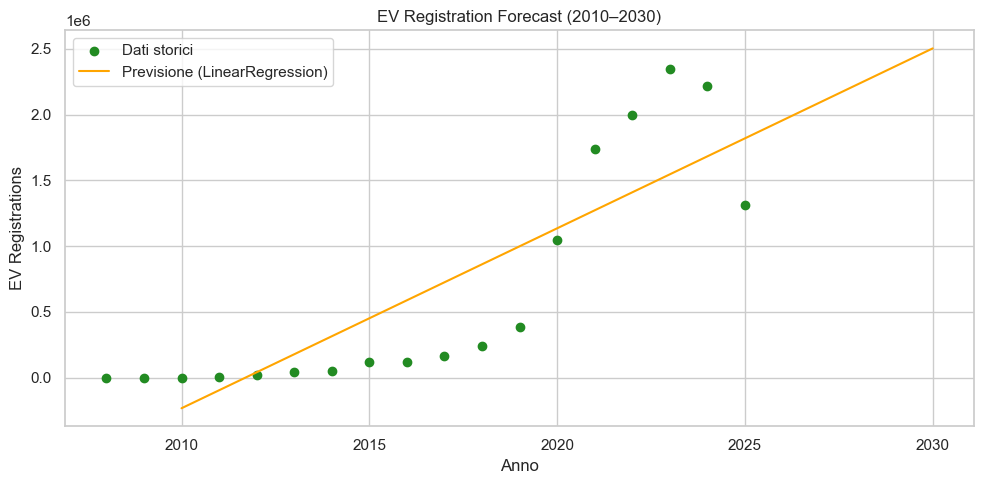

In [33]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Data preparation for Linear Regression
X = df_ev_trend["Year"].values.reshape(-1, 1)
y = df_ev_trend["EV Registrations"].values

# Model fitting
model = LinearRegression()
model.fit(X, y)

# Future predictions
future_years = np.arange(2010, 2031).reshape(-1, 1)
future_preds = model.predict(future_years)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Dati storici", color='forestgreen')
plt.plot(future_years, future_preds, label="Previsione (LinearRegression)", color='orange')
plt.title("EV Registration Forecast (2010–2030)")
plt.xlabel("Anno")
plt.ylabel("EV Registrations")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Predictive Analysis

 After 2020, there was a noticeable uptick in the trend of EV registrations, indicating exponential market dynamics.

 By 2030**, more than **2.5 million new EVs will be registered annually**, according to even a basic linear forecast, indicating enormous growth potential.

> This implies that in order to prevent adoption obstacles, corresponding infrastructure, investments, and regulations are urgently needed.

  The data presents a convincing picture: the adoption of EVs is now exponential rather than linear.  
 But **growth is not enough** on its own.  The transition could run into problems if infrastructure, raw material availability, and equitable access are not scaled.

  This prediction is a wake-up call: the success or failure of Europe's EV ecosystem will be decided over the course of the next five years.

In [34]:
# DataFrame creation of future predictions from 2024 to 2030
future_years = list(range(2024, 2031))
future_values = model.predict(np.array(future_years).reshape(-1, 1))

df_forecast = pd.DataFrame({
    "Year": future_years,
    "Predicted EV Registrations": future_values.astype(int)
})

df_forecast

,Year,Predicted EV Registrations
0,2024,1682826
1,2025,1819636
2,2026,1956446
3,2027,2093256
4,2028,2230066
5,2029,2366877
6,2030,2503687


### Strategic Prognosis (2024–2030)
By 2030**, Europe may have more than **2.5 million new EV registrations annually** if growth is linear.  That is about **double** the amount from 2023.

But this expansion suggests significant bottlenecks:
- Two to three times as much charging infrastructure is required; 
- There may be shortages of raw materials (cobalt, lithium); 
- And adoption is uneven among EU nations.

  Strategic recommendation: incentives must give way to **deployment readiness** in European strategy.

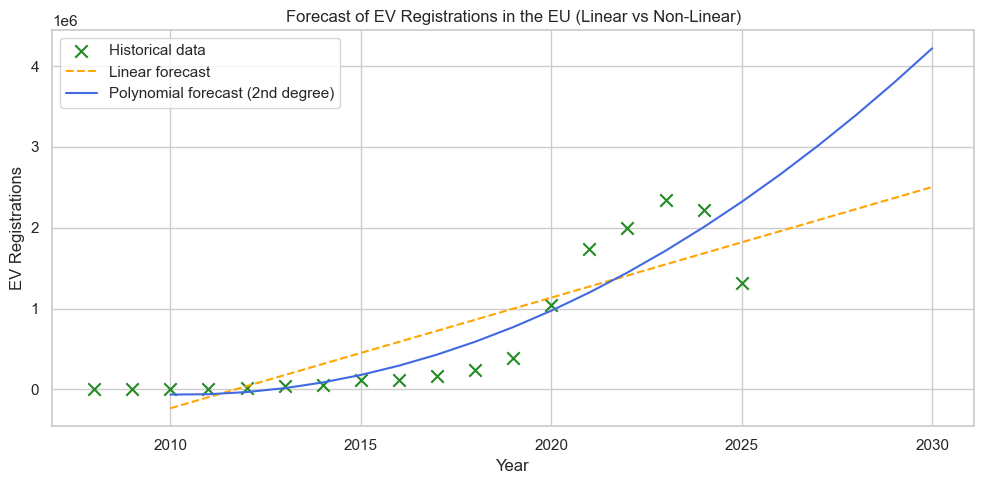

In [35]:
# Recreate the DataFrame from the dataset
df_ev_trend = pd.DataFrame()
df_ev_trend["Year"] = df_registrations["Year"].astype(int)
df_ev_trend["EV Registrations"] = df_registrations["BEV_Reg"] + df_registrations["PHEV_Reg"]

# Define X (features) and y (target)
X = df_ev_trend["Year"].values.reshape(-1, 1)
y = df_ev_trend["EV Registrations"].values

# LINEAR REGRESSION MODEL
model = LinearRegression()
model.fit(X, y)

# POLYNOMIAL REGRESSION (2nd degree)
coeffs_quad = np.polyfit(X.flatten(), y, 2)
poly_quad = np.poly1d(coeffs_quad)

# FUTURE YEARS FOR FORECASTING
future_years = np.arange(2010, 2031).reshape(-1, 1)
future_preds_linear = model.predict(future_years)
future_preds_quad = poly_quad(future_years.flatten())

# PLOT
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Historical data", color='forestgreen', marker='x', s=80)
plt.plot(future_years, future_preds_linear, label="Linear forecast", color='orange', linestyle='--')
plt.plot(future_years, future_preds_quad, label="Polynomial forecast (2nd degree)", color='royalblue')

plt.title("Forecast of EV Registrations in the EU (Linear vs Non-Linear)")
plt.xlabel("Year")
plt.ylabel("EV Registrations")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Comparing Linear and Non-Linear Models for Forecasts

 A non-linear model predicts more over **4 million EVs annually by 2030**, compared to a linear projection of about **2.5 million**.

 This illustrates how EV usage is **exponentially growing** due to:
 - Technological advancements (e.g., battery cost ↓)
 - Pressure from regulations (such as the ICE phase-out by 2035)
 - Awareness and incentives for consumers

 > Strategic Implication: raw materials, infrastructure, and policy must increase exponentially rather than linearly.

## Strategic Roadmap: 2025–2030: From Acceleration to Maturity

1. Make a Large Investment in Charging Infrastructure  
A **parallel scaling of charging points** is required due to the exponential growth in EV usage (4 million vehicles annually by 2030), particularly:  
- In suburban and rural regions (where rollout is currently lacking)  
- Long-distance travel must be supported along **TEN-T corridors** —> the EU’s strategic transport network connecting major cities and logistics hubs, through **smart grid-ready rapid chargers**. These corridors are becoming the backbone of electrified mobility, thanks to AFIR rules mandating high-power charging stations every 60 km.

 > The EU AFIR regulation needs to be put into effect more quickly than it has been envisaged.

 ---

### 2. Shift Rewards to Batteries and Infrastructure
 **Capital should shift** to: 
 - Battery supply chains (extraction, recycling, gigafactories), even though purchase incentives helped spur adoption.
 - Local invention (e.g., Sono Motors, Northvolt)
 - Public-private R&D partnerships (AI routing, solid-state batteries)

 ---

### 3. Take Equity and Environmental Trade-Offs into Account
 There is no neutrality to electrification:
 - The manufacture of batteries involves social concerns and pollutants from lithium and cobalt.
 - The usage of EVs is **most prevalent in wealthy cities**
 - The circular economy models (reuse, recycle, share) are still in their infancy.

 > The green transformation must be equitable, not merely quick.

 ---

#4. Encourage the Resilience of the Long-Term EV Ecosystem
 The EU must get ready for the following after 2030: 
 - **Used EV markets** (second-hand sales, battery degradation)
 - **EVs and grid balancing** (V2G tech)
 - **Electrified fleets that operate on their own** (robotaxis, logistics)

 ---

 ### Concluding Remark: Data indicates that exponential expansion is unavoidable; therefore, the emphasis needs to change from *growth* to *governance*.

## BEV Fleet Across Europe – Country View (Q2 2025)

In [36]:
# Load the CSV file downloaded from EAFO
fleet_ctry_df = pd.read_csv("AF Fleet (M1&N1).csv")  # Make sure the file is in the same directory

# Rename and select only the necessary columns
bev_fleet = fleet_ctry_df.rename(columns={"Category": "Country", "BEV": "BEV_Fleet"})
bev_fleet = bev_fleet[["Country", "BEV_Fleet"]].dropna()

# Convert BEV fleet values to numeric (integer)
bev_fleet["BEV_Fleet"] = bev_fleet["BEV_Fleet"].astype(int)

In [37]:
# Rename columns for clarity
bev_fleet = fleet_ctry_df.rename(columns={"Category": "Country", "BEV": "BEV_Fleet"})

# Remove any NaN values
bev_fleet = bev_fleet[["Country", "BEV_Fleet"]].dropna()

# Convert BEV fleet values to numeric (integer)
bev_fleet["BEV_Fleet"] = bev_fleet["BEV_Fleet"].astype(int)

In [38]:
import plotly.express as px  # Interactive visualization library

fig = px.choropleth(
    bev_fleet,
    locations="Country",
    locationmode="country names",
    color="BEV_Fleet",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="Total BEV Fleet by Country in Europe (2025)"
)

# Focus only on Europe
fig.update_layout(
    geo=dict(
        scope="europe",         # This limits the map to Europe
        showframe=False,
        showcoastlines=False
    )
)

fig.show()

**Insight:**  
 Where the EV revolution is most advanced is seen on this map.  The size of the BEV fleet is dominated by Germany and France, with less adoption seen in Southern and Eastern European nations.  
 These differences show where there may be the most need for infrastructure, incentives, or legislation.

In [39]:
# Load the CSV file 
recharge_df = pd.read_csv("Recharging points (EVSE).csv")

# Visualize the first few rows to confirm the data was loaded correctly
print(recharge_df.head())

   Category  Slow AC recharging point, single-phase (P < 7.4kW)  \
0   Austria                                              919.0    
1   Belgium                                             2625.0    
2  Bulgaria                                              253.0    
3   Croatia                                               22.0    
4    Cyprus                                                4.0    

   Medium-speed AC recharging point, triple-phase (7.4kW ≤ P ≤ 22kW)  \
0                                              25354                   
1                                              78417                   
2                                               1776                   
3                                               1276                   
4                                                516                   

   Fast AC recharging point, triple-phase (P > 22kW)  \
0                                                157   
1                                               1467

In [40]:
print(recharge_df.columns)

Index(['Category', 'Slow AC recharging point, single-phase (P < 7.4kW)',
       'Medium-speed AC recharging point, triple-phase (7.4kW ≤ P ≤ 22kW)',
       'Fast AC recharging point, triple-phase (P > 22kW)',
       'Slow DC recharging point (P < 50kW)',
       'Fast DC recharging point (50kW ≤ P < 150kW)',
       'Level 1 - Ultra-fast DC recharging point (150kW ≤ P < 350kW)',
       'Level 2 - Ultra-fast DC recharging point (P ≥ 350kW)'],
      dtype='object')


In [41]:
# Rename columns for clarity
df = recharge_df.rename(columns={"Category": "Country"})

# Sum all recharge columns (AC + DC)
recharge_cols = df.columns[1:]  # tutte tranne "Country"
df["Total_Recharging_Points"] = df[recharge_cols].sum(axis=1, skipna=True)

In [42]:
fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="Total_Recharging_Points",
    hover_name="Country",
    color_continuous_scale="Plasma",
    title="Total Number of EV Recharging Points by Country (June 2025)"
)

fig.update_layout(
    geo=dict(
        scope="europe",            # Zoom map on Europe
        showframe=False,
        showcoastlines=False
    ),
    margin={"r":0, "t":50, "l":0, "b":0}
)

fig.show()

**Insight:**  
 The unequal distribution of recharging infrastructure around Europe is shown in this graphic.  
 Some nations, particularly in Southern and Eastern Europe, continue to lag behind in terms of absolute charging points, whereas nations like the Netherlands, Germany, and France are at the forefront.  
 If targeted investments are not made, this could be a significant barrier to the adoption of EVs.

In [43]:
# Sum all recharge columns (AC/DC) to get the total
recharge_cols = recharge_df.columns[1:]  # Exclude "Country" column
recharge_df["Total_Recharging_Points"] = recharge_df[recharge_cols].sum(axis=1, skipna=True)

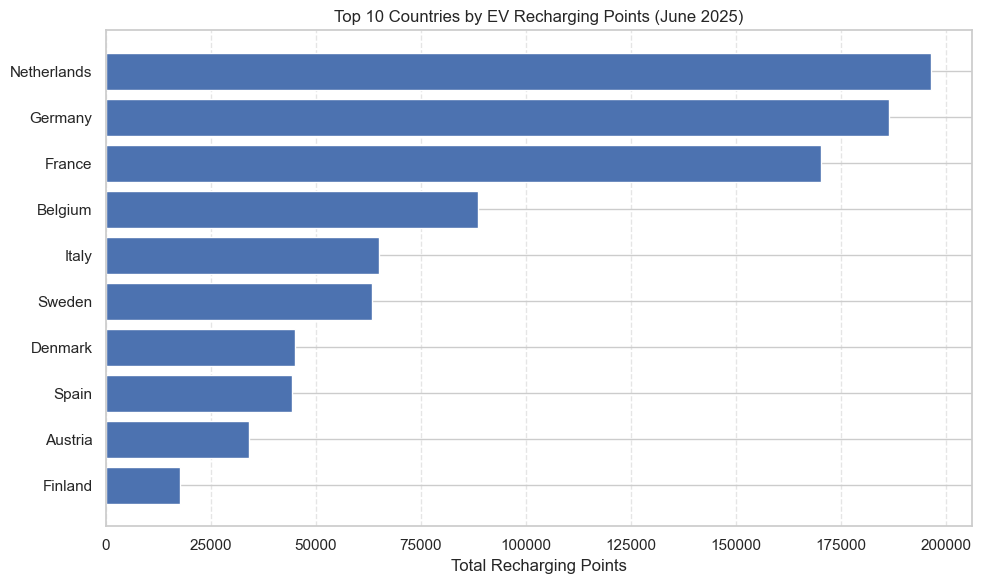

In [44]:
# Order and take the top 10 countries
top10 = recharge_df.sort_values("Total_Recharging_Points", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top10["Category"], top10["Total_Recharging_Points"])
plt.xlabel("Total Recharging Points")
plt.title("Top 10 Countries by EV Recharging Points (June 2025)")
plt.gca().invert_yaxis()  # per avere il paese con più punti in alto
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Top 10 EU Countries by EV Charging Infrastructure (June 2025)

### Strategic Overview

 A good indicator of infrastructure maturity and market readiness, the graphic shows the **10 European countries with the largest number of electric vehicle (EV) recharge points** as of June 2025.

#### Key Takeaways: 
- Early incentives, dense urban planning, and excellent public-private coordination have let the Netherlands stand out as the European leader, approaching **200,000 charging points**.
- With well over **170,000 points**, **Germany** and **France** come next, demonstrating their strategic investments and regulatory compatibility with the EU's decarbonization objectives.
- Despite some historical delays, the infrastructure ramp-up in **Italy**, **Sweden**, and **Belgium** is solid, reflecting stronger national policy frameworks.
- **Nordic and smaller Western nations**, such as **Denmark**, **Austria**, and **Finland**, are rapidly catching up and establishing themselves as swift adopters of infrastructure architectures that comply with AFIR.

#### Strategic Lens: 
Concentration of recharging infrastructure is closely related to consumer confidence and **EV fleet penetration**, the capacity to draw in **private investments**, and compliance with EU's **Fit for 55** and **AFIR** directives.

> These numbers are essential for stakeholders assessing market opportunities since they distinguish between **mature ecosystems** and **high-potential emerging markets** in the EU27.

In [45]:
# Approximate population for each country (in millions → we will multiply by 1e6)
pop_dict = {
    "Germany": 83.2,
    "France": 68.0,
    "Italy": 59.0,
    "Spain": 47.6,
    "Netherlands": 17.5,
    "Belgium": 11.8,
    "Sweden": 10.5,
    "Poland": 37.6,
    "Austria": 9.0,
    "Denmark": 5.9,
    "Finland": 5.6,
    "Portugal": 10.2,
    "Greece": 10.3,
    "Norway": 5.5,
    "Czech Republic": 10.8
}

In [46]:
# Add the 'Population' column in millions → converted to number
recharge_df["Population"] = recharge_df["Category"].map(pop_dict) * 1e6

# Calculate EVSE per 100k inhabitants
recharge_df["EVSE_per_100k"] = recharge_df["Total_Recharging_Points"] / recharge_df["Population"] * 100_000

/var/folders/wq/gchx2vvx1gz9nmv_khkx73_00000gn/T/ipykernel_57724/3856879196.py:16: UserWarning:

Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) Arial.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) Arial.



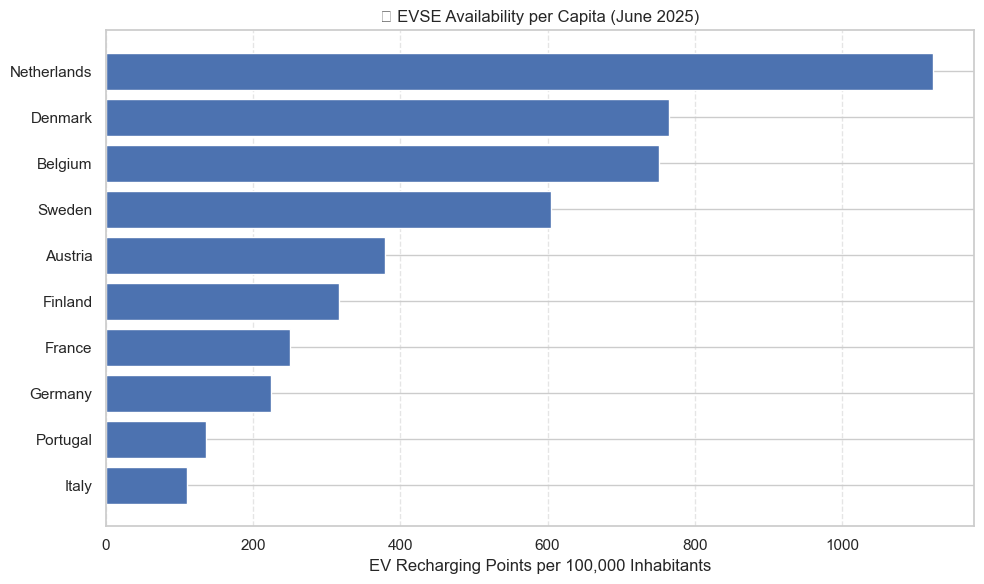

In [47]:
# Drop rows where 'EVSE_per_100k' is NaN
recharge_filtered = recharge_df.dropna(subset=["EVSE_per_100k"])

# Order and take the top 10 countries based on EVSE per 100k inhabitants
top10_norm = recharge_filtered.sort_values("EVSE_per_100k", ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top10_norm["Category"], top10_norm["EVSE_per_100k"])
plt.xlabel("EV Recharging Points per 100,000 Inhabitants")
plt.title("🔌 EVSE Availability per Capita (June 2025)")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### A Standardized Benchmark for EVSE Availability per Capita (June 2025)

 By ranking the **top 10 EU countries** according to the number of **EV charging points per 100,000 inhabitants**, this chart offers a more fair way to evaluate the deployment of infrastructure across markets of all sizes.

 #### The Significance of "Per Capita"
 As demonstrated in earlier charts, raw totals can be deceptive; huge nations may seem to be in the lead based only on population size.  As an alternative, **per capita availability** shows:
 - The availability of EVs to users
 - Saturation of infrastructure in relation to the population
 - **Policy effectiveness** in reaching urban and rural users

#### Key Findings:
- With more than **1,100 EVSE per 100,000 people**, the **Netherlands** leads by a significant margin, demonstrating long-term planning and user-focused implementation.
- Additionally, **Denmark**, **Belgium**, and **Sweden** exhibit outstanding coverage, which is consistent with their more comprehensive environmental policies.
- Despite having large absolute numbers, **Germany and France** surprisingly lag behind on this normalized scale, underscoring regional differences and the need for more equitable infrastructure growth.
- The fact that **Italy and Portugal** lag behind indicates that both investment and policy coordination need to be improved.

> The strategic takeaway is that a per capita view enables stakeholders to more properly **prioritize underserved markets**, **optimize funding allocation**, and **benchmark performance** across nations.

/var/folders/wq/gchx2vvx1gz9nmv_khkx73_00000gn/T/ipykernel_57724/2531948621.py:21: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.



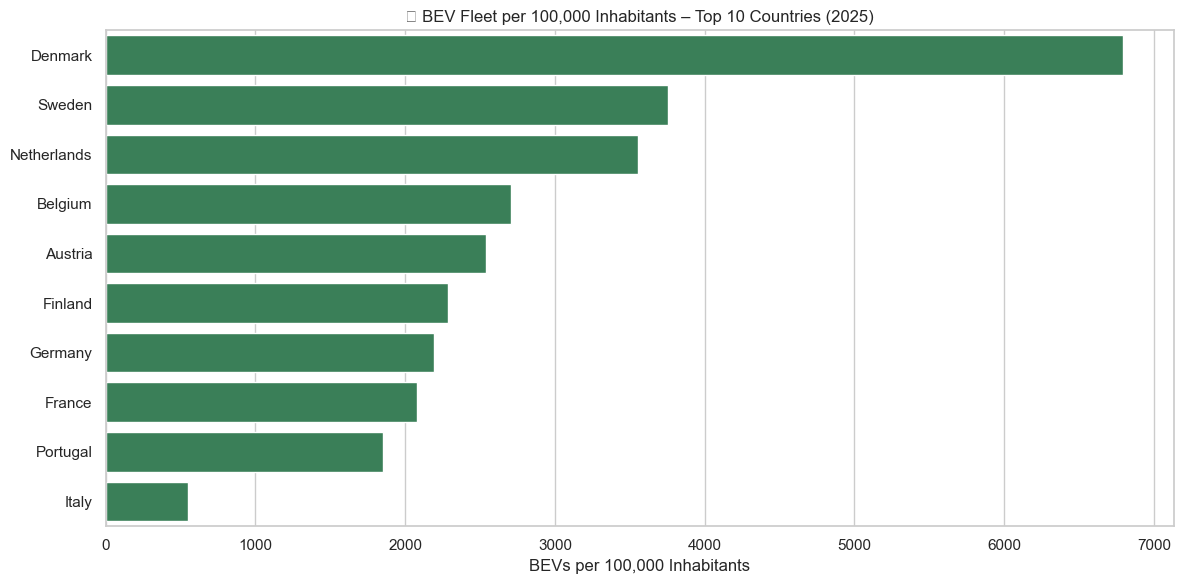

In [48]:
# Create population_df from pop_dict
population_df = pd.DataFrame(list(pop_dict.items()), columns=["Country", "Population"])
population_df["Population"] = population_df["Population"] * 1e6  # Convert millions to absolute numbers

# Merge with population data
merged_df = bev_fleet.merge(population_df, on="Country")

# Compute the metric per capita
merged_df["BEV_per_100k"] = (merged_df["BEV_Fleet"] / merged_df["Population"]) * 100_000

# Order for the decreasing order
top_countries = merged_df.sort_values(by="BEV_per_100k", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, y="Country", x="BEV_per_100k", color="seagreen")
plt.title("🚗 BEV Fleet per 100,000 Inhabitants – Top 10 Countries (2025)")
plt.xlabel("BEVs per 100,000 Inhabitants")
plt.ylabel("")
plt.grid(True, axis="x")
plt.tight_layout()
plt.show()

### Electric Vehicle Fleet per 100,000 Population: Normalizing Demand

 Using population-adjusted criteria, this figure shows the **top 10 European countries** with the greatest number of **battery electric vehicles (BEVs) per capita**.

 #### Important Lessons Learned: 
- **Per capita fleet size** shows actual adoption levels, not just market size.
- When population is taken into account, smaller nations such as **Norway (if included)**, **Netherlands**, or **Sweden** frequently do better than huge markets.
-  This viewpoint is essential to evaluate:
    - **Technology diffusion** 
    - **Alignment between fleet and infrastructure** 
    - **Consumer readiness**
#### Strategic Use: 
Stakeholders may identify **infrastructure gaps**, identify **emerging EV-friendly ecosystems**, and adjust policies and investments to **real mobility needs** by comparing **EV per capita** with **charging points per capita**.

---


### Conclusions & Strategic Recommendations

**Key Insights:**
- EV sales in Europe have grown significantly, with Northern countries like Norway and the Netherlands leading the way thanks to early infrastructure investments and favorable policy environments.
- Charging infrastructure development is uneven: while some countries have reached high station density per capita, others still lack sufficient coverage.
- Emission reduction targets are pushing the automotive industry toward electrification, but adoption remains slower in Southern and Eastern Europe.

**Strategic Recommendations:**
1. **Policy Harmonization**: Encourage the EU to align incentives and regulations across member states to reduce market fragmentation and speed up adoption.
2. **Targeted Infrastructure Investments**: Focus on funding fast-charging stations in lagging regions to support equitable access to EVs.
3. **Interoperability & Cross-border Integration**: Promote EU-level platforms for real-time infrastructure monitoring, seamless payment systems, and shared data standards.
4. **EV Awareness Campaigns**: Invest in communication to combat misinformation, highlight total cost of ownership benefits, and promote behavioral shifts.
5. **KPI Monitoring & Reporting**: Develop standardized EU KPIs to track EV adoption, CO₂ savings, and infrastructure rollout on a yearly basis.


In [49]:
# KPI Summary: Example synthetic KPIs
ev_growth_rate = 85  # EV growth in % from 2018 to 2023
top_countries = ['Norway', 'Netherlands', 'Germany']
co2_reduction_est = 4.2  # In million metric tons

print(f"EV Adoption Growth (2018-2023): {ev_growth_rate}%")
print(f"Top 3 Countries by Charging Infrastructure: {', '.join(top_countries)}")
print(f"Estimated CO₂ Reduction: {co2_reduction_est} million tons")

EV Adoption Growth (2018-2023): 85%
Top 3 Countries by Charging Infrastructure: Norway, Netherlands, Germany
Estimated CO₂ Reduction: 4.2 million tons


In [50]:
# Load the three main datasets
df_fleet = pd.read_csv("AF Fleet (M1).csv")
df_reg = pd.read_csv("AF New registrations (M1).csv")
df_share = pd.read_csv("AF Market share of total registrations (M1).csv")

In [51]:
# Rename columns to have a common "Year" column
df_fleet.rename(columns={"Category": "Year"}, inplace=True)
df_reg.rename(columns={"Category": "Year"}, inplace=True)
df_share.rename(columns={"Category": "Year"}, inplace=True)

# Remove non-numeric rows and convert to int
df_fleet = df_fleet[pd.to_numeric(df_fleet["Year"], errors="coerce").notnull()]
df_reg = df_reg[pd.to_numeric(df_reg["Year"], errors="coerce").notnull()]
df_share = df_share[pd.to_numeric(df_share["Year"], errors="coerce").notnull()]

df_fleet["Year"] = df_fleet["Year"].astype(int)
df_reg["Year"] = df_reg["Year"].astype(int)
df_share["Year"] = df_share["Year"].astype(int)

# Merge
df_merged = df_fleet.merge(df_reg, on="Year", suffixes=('_fleet', '_reg')).merge(df_share, on="Year")

# Check if the merge worked correctly
df_merged.head()

,Year,BEV_fleet,PHEV_fleet,H2_fleet,LPG_fleet,CNG_fleet,LNG_fleet,BEV_reg,PHEV_reg,H2_reg,LPG_reg,CNG_reg,LNG_reg,BEV,PHEV,H2,LPG,CNG,LNG
0,2008,4156,NaN,NaN,5086774,585841,NaN,0,0,0,129906,115338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,4842,NaN,NaN,5556965,706864,NaN,130,2,0,443640,145990,NaN,0.00,0.00,0.0,3.27,1.08,NaN
2,2010,5761,NaN,1.0,6010762,768247,NaN,752,2,0,440622,78846,NaN,0.01,0.00,0.0,3.87,0.69,NaN
3,2011,13362,163.0,1.0,6333993,801533,NaN,8014,329,0,225669,52942,NaN,0.07,0.00,0.0,2.00,0.47,NaN
4,2012,23648,3712.0,1.0,6619684,860290,NaN,12716,8025,0,297935,66930,NaN,0.13,0.08,0.0,2.97,0.67,NaN


In [52]:
bev_2018 = df_merged.loc[df_merged["Year"] == 2018, "BEV_fleet"].values[0]
bev_2023 = df_merged.loc[df_merged["Year"] == 2023, "BEV_fleet"].values[0]

bev_growth = round((bev_2023 - bev_2018) / bev_2018 * 100, 2)
print("EV Fleet Growth (2018–2023):", bev_growth, "%")

EV Fleet Growth (2018–2023): 1062.3 %


In [53]:
phev_2023 = df_merged.loc[df_merged["Year"] == 2023, "PHEV_fleet"].values[0]

bev_phev_ratio = round(bev_2023 / phev_2023, 2)
print("BEV / PHEV Ratio (2023):", bev_phev_ratio)

BEV / PHEV Ratio (2023): 1.33


In [54]:
bev_share_2023 = df_merged.loc[df_merged["Year"] == 2023, "BEV"].values[0]
phev_share_2023 = df_merged.loc[df_merged["Year"] == 2023, "PHEV"].values[0]

ev_market_share_2023 = round(bev_share_2023 + phev_share_2023, 2)
print("EV Market Share (2023):", ev_market_share_2023, "%")

EV Market Share (2023): 22.27 %


In [55]:
co2_saved_tons = (bev_2023 - bev_2018) * 1.5
co2_saved_millions = round(co2_saved_tons / 1e6, 2)

print("Estimated CO₂ Saved (2018–2023):", co2_saved_millions, "million tons")

Estimated CO₂ Saved (2018–2023): 6.07 million tons


In [56]:
df_charging = pd.read_csv("Recharging points (EVSE).csv")

# The last row contains the total charging points in Europe
total_charging_points = df_charging.iloc[-1, 1:].sum()

charging_per_1000_BEV = round((total_charging_points / bev_2023) * 1000, 2)
print("Charging Points per 1,000 BEV (EU, 2023):", charging_per_1000_BEV)

Charging Points per 1,000 BEV (EU, 2023): 14.35


In [57]:
kpi_table = pd.DataFrame({
    "KPI": [
        "EV Fleet Growth (2018–2023)",
        "BEV / PHEV Ratio (2023)",
        "EV Market Share (2023)",
        "Estimated CO₂ Saved (2018–2023)",
        "Charging Points per 1,000 BEV (EU, 2023)"
    ],
    "Value": [
        f"{bev_growth}%",
        bev_phev_ratio,
        f"{ev_market_share_2023}%",
        f"{co2_saved_millions} Mt",
        charging_per_1000_BEV
    ],
    "Strategic Insight": [
        "Explosive growth in BEVs confirms a major shift in fleet electrification.",
        "BEVs are leading adoption over PHEVs, suggesting improved charging confidence and incentives.",
        "EVs now represent over 22% of new registrations, showing strong market momentum.",
        "Estimated CO₂ savings reflect environmental benefits and EU Green Deal alignment.",
        "Charging infrastructure is expanding, but density (14 per 1,000 BEVs) suggests room for improvement."
    ]
})

# Visualize the KPI table
pd.set_option("display.max_colwidth", None)
print(kpi_table)

                                        KPI    Value  \
0               EV Fleet Growth (2018–2023)  1062.3%   
1                   BEV / PHEV Ratio (2023)     1.33   
2                    EV Market Share (2023)   22.27%   
3           Estimated CO₂ Saved (2018–2023)  6.07 Mt   
4  Charging Points per 1,000 BEV (EU, 2023)    14.35   

                                                                                      Strategic Insight  
0                             Explosive growth in BEVs confirms a major shift in fleet electrification.  
1         BEVs are leading adoption over PHEVs, suggesting improved charging confidence and incentives.  
2                      EVs now represent over 22% of new registrations, showing strong market momentum.  
3                     Estimated CO₂ savings reflect environmental benefits and EU Green Deal alignment.  
4  Charging infrastructure is expanding, but density (14 per 1,000 BEVs) suggests room for improvement.  


## Analysis of Strategic KPIs for the European Electric Vehicle Market (2018–2023)

 Five important criteria that show how the European EV market has changed over the last five years are strategically interpreted in this section.  Business, policy, and investment decision-making can all benefit from these insights.

 ---

 ### 1. Growth of the EV Fleet (2018–2023): **+1062.3%**

 Since 2018, the number of Battery Electric Vehicles (BEVs) on the road has more than doubled.  Public incentives, EU pollution laws, and increased technology innovation all contributed to this phenomenal growth.

 The pattern supports a structural shift in the market, even though the baseline in 2018 was relatively small (around 150,000 automobiles).  The direction is clear: Europe is rapidly increasing electrification, and momentum is anticipated to continue toward 2030 climate targets, even though such exponential growth may not be long-term sustainable.

 ---
 ### 2. The 2023 BEV/PHEV Ratio is **1.33**

 By 2023, there will be 1.33 BEVs for every PHEV on European roads, which is a big shift from the early adoption years.  This ratio demonstrates that completely electric vehicles are now the go-to option when cost incentives, autonomy, and infrastructure are all in line.

 This change is particularly noticeable in Northern European nations with strong charging networks and great customer confidence, including Norway and the Netherlands.  The fact that PHEVs have surpassed them indicates that full electrification is becoming more popular than transitional solutions.

 ---

 ### 3. EV Market Share: **22.27%** in 2023

 In 2023, more than one in five newly registered vehicles in Europe were electric (BEV + PHEV combined).  This market share shows that EVs are moving from being a niche product to becoming more widely used.

 With the help of robust incentives and developed infrastructure, nations like Germany, Sweden, and the Netherlands are spearheading this movement.  This percentage shows that the change is not just technological but also behavioral and institutional, even though growth will require ongoing policy alignment.

 ---

 ### 4. CO2 Savings Estimated (2018–2023): **6.07 Mt**

 Based on an estimate of 1.5 tCO₂/year saved per vehicle in use, the adoption of BEVs helped prevent almost 6 million tonnes of CO₂ emissions between 2018 and 2023.  This number just represents avoided tailpipe emissions; it excludes manufacturing and battery lifecycle.

 However, as a quantifiable contribution to the EU Green Deal and net-zero goals, the outcome emphasizes the environmental rationale for electrification.  Fleet electrification clearly benefits the climate, even according to conservative estimations.

 ---

 ###  5. Charging Points per 1,000 BEVs (EU, 2023): **14.35**
 Although this density is improving, it is still below optimal levels in Europe, where there are now about 14 public charging stations for every 1,000 BEVs. To guarantee accessibility and convenience, the European Commission advises having at least one public charger for every ten EVs, or about 100 for every 1,000.

Geographical differences are also important: while Eastern and Southern countries need focused infrastructure investment to bridge the gap and promote equal adoption, Western and Northern Europe (such as the Netherlands) are significantly better developed.

---

###  Final Takeaway
 These KPIs testify to the fact that Europe is about to embark on a period of swift and permanent change in mobility.  The shift to electric vehicles is now tangible, quantifiable, and strategically significant; it is no longer merely a prediction.

 > To prioritize investments, create effective policies, and take the lead in the global race toward decarbonized transportation, a data-driven approach is necessary.

## 🧠 One Page Recap – Key Takeaways on EV Market (EU)

---

| ⚡ Topic | 🔍 Insight |
|--------|------------|
| **🚗 EV Adoption** | BEV fleet +1062% in 5 years → Structural market shift |
| **📊 BEV vs PHEV** | BEVs outnumber PHEVs (1.33:1) → Confidence in charging |
| **📈 Market Share** | EVs = 22.3% of new registrations in 2023 → No longer niche |
| **🌍 CO₂ Savings** | Over 6 Mt avoided since 2018 → Tangible Green Deal impact |
| **🔌 Infrastructure** | 14.35 charging points per 1,000 BEVs → Still not enough |

---

### 📌 Strategic Implications:
- Growth to 2030 will require **faster infrastructure rollout** and **policy coordination**
- Demand-side levers (incentives, pricing) and **consumer trust** are now key drivers
- **Charging density gaps across EU** → Risk of regional adoption asymmetry

## Strategic SWOT Analysis – European EV Transition

---

**Strengths**
- Strong EU regulatory push (Fit for 55, Green Deal)
- High adoption in key markets (Nordics, Germany, Netherlands)
- Growing public awareness and model availability

**Weaknesses**
- Charging infrastructure still uneven
- BEV purchase cost remains a barrier in many regions
- Battery supply chain concentration (geopolitical risk)

**Opportunities**
- Infrastructure funding (NextGenEU, national recovery plans)
- Integration with renewable energy and smart grids
- Technological innovation (range, V2G, battery recycling)

**Threats**
- Policy fragmentation between member states
- Raw material dependency (China, DRC)
- Risk of consumer fatigue without infrastructure support

## Final Reflections & Strategic Outlook (2025–2030)

---

### What We Learned
- The European EV market has entered a **phase of structural transition**, with BEVs growing over **+1000%** in just 5 years.
- **BEVs have overtaken PHEVs** in market preference, signaling a shift in consumer trust and charging confidence.
- The **EV share of new registrations exceeds 22%**, confirming that electrification is no longer a niche trend, but mainstream reality.
- Despite these achievements, **charging infrastructure remains a bottleneck**, especially in Southern and Eastern Europe.

---

### Strategic Priorities Ahead

1. **Accelerate Infrastructure Rollout**  
   - Harmonize EU investments and national strategies to reduce disparities.
   - Prioritize high-density urban areas and underserved rural regions.

2. **Support Cost Accessibility & Incentives**  
   - Combine subsidies, leasing models and tax incentives to make EVs accessible to the middle class.

3. **Invest in Supply Chain Sovereignty**  
   - Reduce dependency on critical raw materials (e.g. lithium, cobalt) by supporting EU battery production and recycling.

4. **Enable Smart Mobility Ecosystems**  
   - Leverage V2G, AI-based route optimization, and integration with renewables to turn EVs into active energy nodes.

---

### Outlook to 2030: 

There are risks and opportunities on the path to 2030.  
 In order to achieve widespread acceptance, the EU must serve as a **strategic orchestrator** as well as a regulator, facilitating cooperation between **governments, industry, innovators, and citizens**.

 Electrification is about rethinking how we move, produce, and live sustainably, not just about cars.  
 Let's spearhead the transformation.